In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
%reload_ext autoreload
%autoreload 2

from src.constants import csv_file, directory, INPUT_SHAPE, YEAR, ext

from src.utils import Dataset_Diabetic, data_class
from src.utils import (
    plot_samples,
    get_dataloader,
    plot_confusion_matrix,
    calculate_confusion_matrix,
    split_val,
)

from src.model import Model_Retinopathy

from src.constants import EPOCHS, BATCH_SIZE, LEARNING_RATE, UPDATES

In [4]:
# MODEL STUFF
model = Model_Retinopathy(torch.optim.Adam).to(device)

In [5]:
# DATA STUFF
df = pd.read_csv(csv_file)
train_df, val_df = split_val(df, 0.05)

train_data, train_loader = get_dataloader(train_df, ext, directory, BATCH_SIZE, False)
val_data, val_loader = get_dataloader(val_df, ext, directory, BATCH_SIZE, False)

update_every = len(train_loader) // UPDATES

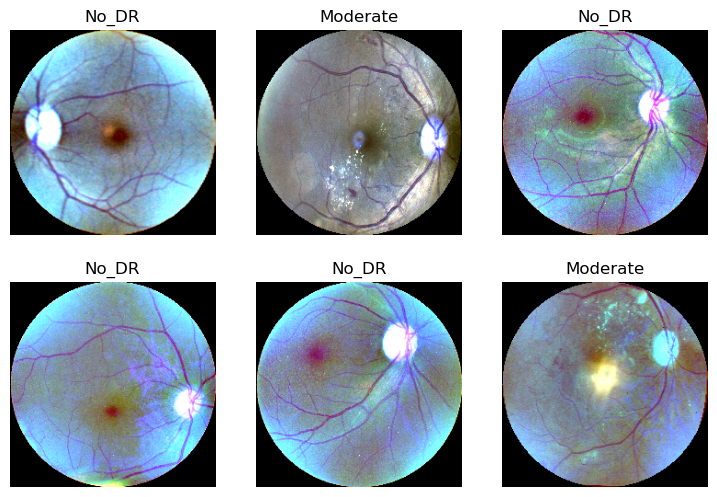

In [6]:
plot_samples(train_data, 2, 3)

In [7]:
model.train_loop(train_loader, val_loader, epochs=EPOCHS)

Epoch: 0
Batch #0: Loss:  2.48890 Accuracy:  0.2500
Batch #27: Loss:  2.34898 Accuracy:  0.1250
Batch #54: Loss:  1.71399 Accuracy:  0.2188
Batch #81: Loss:  1.68120 Accuracy:  0.2500
Batch #108: Loss:  1.42769 Accuracy:  0.3478
VALIDATION:  {'accuracy': 0.453551912568306, 'loss': 1.369319200515747}
Epoch: 1
Batch #0: Loss:  1.33793 Accuracy:  0.4375
Batch #27: Loss:  1.21776 Accuracy:  0.5625
Batch #54: Loss:  1.27676 Accuracy:  0.5312
Batch #81: Loss:  1.13235 Accuracy:  0.6875
Batch #108: Loss:  1.45968 Accuracy:  0.4783
VALIDATION:  {'accuracy': 0.5519125683060109, 'loss': 1.2536400059858959}
Epoch: 2
Batch #0: Loss:  1.47594 Accuracy:  0.4062
Batch #27: Loss:  1.39030 Accuracy:  0.5000
Batch #54: Loss:  1.52974 Accuracy:  0.3438
Batch #81: Loss:  1.02764 Accuracy:  0.7188
Batch #108: Loss:  1.47222 Accuracy:  0.3913
VALIDATION:  {'accuracy': 0.5628415300546448, 'loss': 1.2028601666291554}
Epoch: 3
Batch #0: Loss:  1.63061 Accuracy:  0.3125
Batch #27: Loss:  1.50072 Accuracy:  0.46

In [14]:
model.unfreeze(0.7)
model.update_lr(LEARNING_RATE / 5)
model.train_loop(train_loader, val_loader, epochs=5)

Epoch: 15
Batch #0: Loss:  0.89469 Accuracy:  0.6875
Batch #27: Loss:  0.83810 Accuracy:  0.7188
Batch #54: Loss:  0.72375 Accuracy:  0.7500
Batch #81: Loss:  0.75985 Accuracy:  0.7500
Batch #108: Loss:  0.90542 Accuracy:  0.6522
VALIDATION:  {'accuracy': 0.73224043715847, 'loss': 0.7019769847393036}
Epoch: 16
Batch #0: Loss:  0.81527 Accuracy:  0.6562
Batch #27: Loss:  0.59992 Accuracy:  0.7500
Batch #54: Loss:  0.65286 Accuracy:  0.7500
Batch #81: Loss:  0.63599 Accuracy:  0.8125
Batch #108: Loss:  0.69861 Accuracy:  0.6522
VALIDATION:  {'accuracy': 0.73224043715847, 'loss': 0.70900559425354}
Epoch: 17
Batch #0: Loss:  0.70269 Accuracy:  0.7500
Batch #27: Loss:  0.75497 Accuracy:  0.6875
Batch #54: Loss:  0.66395 Accuracy:  0.7500
Batch #81: Loss:  0.92367 Accuracy:  0.7188
Batch #108: Loss:  0.54948 Accuracy:  0.8696
VALIDATION:  {'accuracy': 0.73224043715847, 'loss': 0.7079050441582998}
Epoch: 18
Batch #0: Loss:  0.68504 Accuracy:  0.7500
Batch #27: Loss:  0.86114 Accuracy:  0.6250

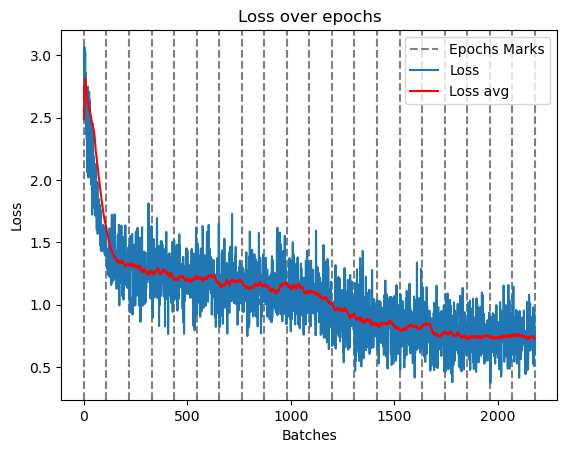

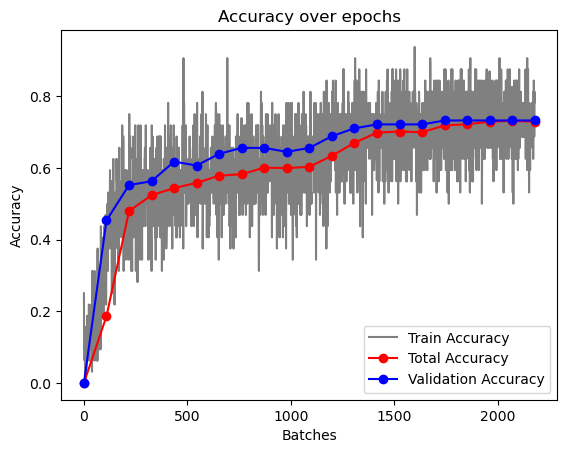

In [15]:
ax = model.plot_loss()
plt.show()
ax = model.plot_accuracy()
plt.show()

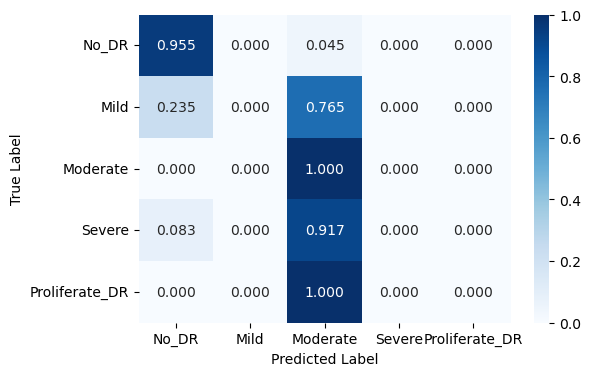

In [16]:
confusion_matrix = calculate_confusion_matrix(model, val_loader)
plot_confusion_matrix(confusion_matrix, data_class.values())

In [17]:
extra_year = 2015 if YEAR == 2019 else 2019
ext = "png" if extra_year == 2019 else "jpeg"
extra_dir = f"Data/Resized/preprocessed_{extra_year}_ben_color"
extra_csv = f"Data/Resized/train_{extra_year}.csv"
extra_df = pd.read_csv(extra_csv)

extra_data, extra_loader = get_dataloader(extra_df, ext, extra_dir, BATCH_SIZE, False)

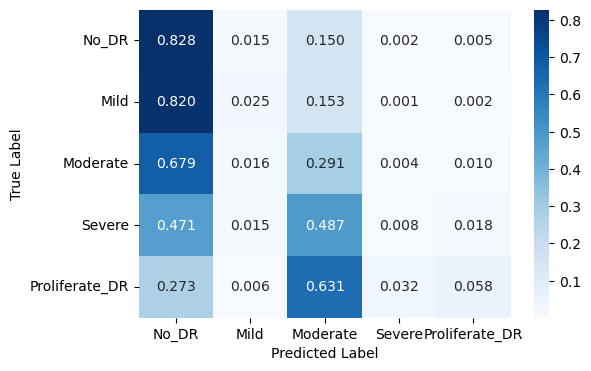

In [18]:
confusion_matrix = calculate_confusion_matrix(model, extra_loader)
plot_confusion_matrix(confusion_matrix, data_class.values())

In [19]:
model.validate(val_loader)

{'accuracy': 0.73224043715847, 'loss': 0.699887235959371}